# Analysis and Prediction-Indian Liver Patients.
The dataset was downloaded from the UCI ML Repository.
https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)#

In [82]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB, ComplementNB, BernoulliNB, MultinomialNB
import matplotlib.pyplot as plt
%matplotlib inline

# Reading DATASET

In [83]:
data = pd.read_csv('indian_liver_patient.csv')

In [84]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [85]:
data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [87]:
data.isnull().sum(axis=0)

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

<AxesSubplot:>

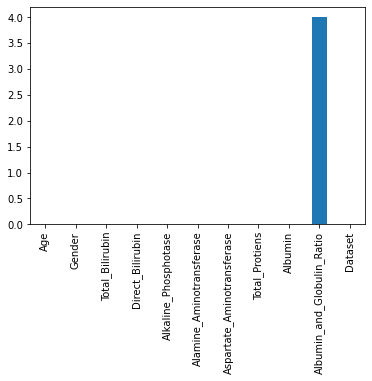

In [88]:
data.isnull().sum(axis=0).plot.bar()

We can already see a few problems:
1. Some columns (such as `gender') have non-numeric values. We should convert their values to become numeric.
2. The `Albumin_and_Globulin_Ratio` column have `NaN` values which represent missing/unknown values. We should remove/fill this missing data.

In [89]:
data[data['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


# Data Cleanning

# Data Size Before cleaning process

In [90]:
print(len(data))

583


In [91]:
# Replace infinite updated data with nan
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
data.dropna(inplace=True)
print(data)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [92]:
data.isnull().sum(axis=0)

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

# Data Size After cleanning process of nan values

In [93]:
print(len(data))

579


# Encoding of non-numeric values
We need to convert non-numeric values to numeric values. But first, we need to understand the type of each non-numeric column. There are mainly 3 types:
1. Binary: The column contains only 2 types of values (example: married: yes/no).
2. Nominal: The column contains more than 2 types of values; The values can't have a specific order (example: country: Egypt/France/UK).
3. Ordinal: The column contains more than 2 types of values; The values have a specific order (example: size: small/medium/large).

To determine the type of each non-numeric column, we need to know what unique values does each column contain

In [94]:
for col in ['Gender']:
    print(col, data[col].unique())

Gender ['Female' 'Male']


We can see the following:
- The columns `Gender` are binary values

Then we use pd.get_dummies() to convert the non-numeric columns to one-hot encoding

In [95]:
data_encoded_final = pd.get_dummies(data)

data_encoded_final.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


If there are too many columns, we can't see all of them using `data_encoded_final.head()`. Instead, we can use `data_encoded_final.dtypes` to display column names and their data types. We notice that all columns have become numeric.

In [96]:
data_encoded_final.dtypes

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
Gender_Female                   uint8
Gender_Male                     uint8
dtype: object

# Checking for imbalanced output

In [97]:
data['Dataset'].value_counts()

1    414
2    165
Name: Dataset, dtype: int64

Number of records after deleting nan values :579

Number of patients likely to have liver disease: 414

Number of patients unlikely to have liver disease: 165

Percentage of patients likely to have liver disease = (n_records_liv_pos/n_records)*100= 71.5%

<AxesSubplot:>

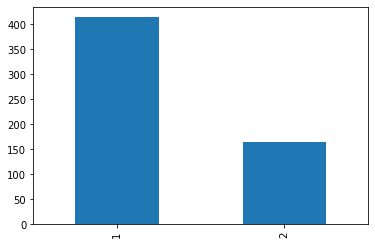

In [98]:
data['Dataset'].value_counts().sort_index().plot.bar()

The output is imbalanced with class 1 $\gg$ class 2

In [99]:
data['Gender'].value_counts()

Male      439
Female    140
Name: Gender, dtype: int64

<AxesSubplot:>

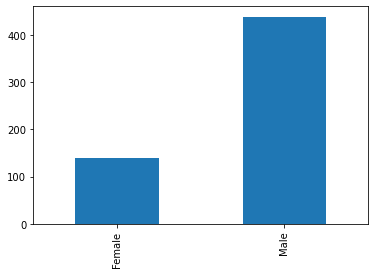

In [100]:
data['Gender'].value_counts().sort_index().plot.bar()

# Splitting data into input and output
- The input consists of all columns.
- The output is the `Dataset` column.

In [101]:
data_input = data_encoded_final.drop(columns=['Dataset'])
data_output = data_encoded_final['Dataset']

# Splitting data into train, validation, and test

In [102]:
X, X_test, y, y_test = train_test_split(
    data_input, data_output, test_size=0.30, random_state=0
)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=0
)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('-------------------------')
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('-------------------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (283, 11)
y_train: (283,)
-------------------------
X_val: (122, 11)
y_val: (122,)
-------------------------
X_test: (174, 11)
y_test: (174,)


# Solving the problem of imbalanced data
Displaying output value counts for our training set

In [103]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.5, random_state=0)
#(0)->معناه انه كل مرة هيمسح random
#(1)->معناها انه هيسمح من الكبير لحد ما يبقي أد الصغير

In [104]:
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

y_train_rus.value_counts()

1    162
2     81
Name: Dataset, dtype: int64

In [105]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1.0, random_state=0)

X_train_balanced, y_train_balanced = ros.fit_resample(X_train_rus, y_train_rus)

# Uncomment the following line if you want to see the difference when the data is not balanced
#X_train_balanced, y_train_balanced = X_train, y_train

y_train_balanced.value_counts()

1    162
2    162
Name: Dataset, dtype: int64

# >>Model selection

# >> 1.First Algorithim is KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors = 100) # n_neighbors is k
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_val = model2.predict(X_val)

In [107]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)

print('accuracy_train =', accuracy_train)
print('accuracy_val =', accuracy_val)

accuracy_train = 0.7137809187279152
accuracy_val = 0.7377049180327869


In [108]:
n_neighbours_values = list(range(1, 31))
accuracy_train_values = []
accuracy_val_values = []

for n_neighbours in n_neighbours_values:
    model2 = KNeighborsClassifier(n_neighbors = n_neighbours)
    model2.fit(X_train, y_train)
    y_pred_train = model2.predict(X_train)
    y_pred_val = model2.predict(X_val)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    accuracy_train_values.append(accuracy_train)
    accuracy_val_values.append(accuracy_val)
    
results = pd.DataFrame({
    'n_neighbours': n_neighbours_values,
    'accuracy_train': accuracy_train_values,
    'accuracy_val': accuracy_val_values
})

In [109]:
results

,n_neighbours,accuracy_train,accuracy_val
0,1,1.000000,0.606557
1,2,0.826855,0.704918
2,3,0.830389,0.663934
3,4,0.798587,0.729508
4,5,0.773852,0.663934
5,6,0.759717,0.713115
6,7,0.745583,0.696721
7,8,0.745583,0.696721
8,9,0.734982,0.696721
9,10,0.742049,0.696721


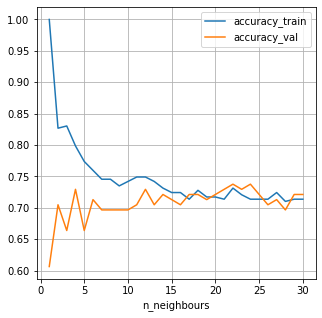

In [110]:
results.plot(x='n_neighbours', y=['accuracy_train', 'accuracy_val'], figsize=(5, 5))
plt.grid(axis='both')

According to the previous plot, we select n_neighbours = 25 as the best value for n_neighbours

# Tunning Weight

In [118]:
weights_values = ['uniform', 'distance']
accuracy_train_values = []
accuracy_val_values = []

for weights in weights_values:
    model2 = KNeighborsClassifier(n_neighbors=25, weights=weights)
    model2.fit(X_train, y_train)
    y_pred_train = model2.predict(X_train)
    y_pred_val = model2.predict(X_val)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    accuracy_train_values.append(accuracy_train)
    accuracy_val_values.append(accuracy_val)
    
results = pd.DataFrame({
    'weights': weights_values,
    'accuracy_train': accuracy_train_values,
    'accuracy_val': accuracy_val_values
})

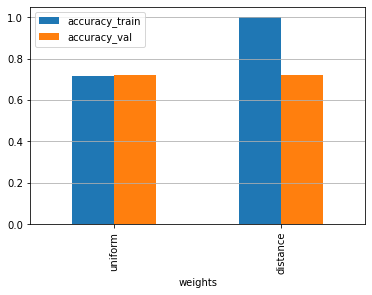

In [119]:
results.plot.bar(x='weights', y=['accuracy_train', 'accuracy_val'])
plt.grid(axis='y')

According to the previous plot weights='uniform' is better than weights='distance'

# Final Test

In [165]:
best_model = KNeighborsClassifier(n_neighbors=25, weights='uniform')
best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(accuracy_test)

0.6896551724137931


# 2.Second Model Algorthim is Naive Bayes

We try different types of Naive Bayes classifiers 

In [121]:
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
248,40,0.7,0.1,202,37,29,5.0,2.6,1.0,0,1
65,57,1.4,0.7,470,62,88,5.6,2.5,0.8,0,1
513,69,0.9,0.2,215,32,24,6.9,3.0,0.7,0,1
126,48,5.8,2.5,802,133,88,6.0,2.8,0.8,0,1
456,32,0.7,0.2,189,22,43,7.4,3.1,0.7,0,1


In [122]:
y.head()

248    1
65     1
513    1
126    1
456    2
Name: Dataset, dtype: int64

## Helper function: Evaluate model

In [123]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    return (acc_train, acc_val)

### Model 1: Gaussian Naive Bayes

In [124]:
model1 = GaussianNB()
acc_train1, acc_val1 = evaluate_model(model1, X_train, y_train, X_val, y_val)
print(acc_train1)
print(acc_val1)

0.5512367491166078
0.5


### Model 2: Complement Naive Bayes

In [125]:
model2 = ComplementNB()
acc_train2, acc_val2 = evaluate_model(model2, X_train, y_train, X_val, y_val)
print(acc_train2)
print(acc_val2)

0.5017667844522968
0.45081967213114754


### Model 3: Bernoulli Naive Bayes

In [126]:
model3 = BernoulliNB()
acc_train3, acc_val3 = evaluate_model(model3, X_train, y_train, X_val, y_val)
print(acc_train3)
print(acc_val3)

0.7137809187279152
0.7377049180327869


### Model 4: Multinomial Naive Bayes

In [127]:
model4 = MultinomialNB()
acc_train4, acc_val4 = evaluate_model(model4, X_train, y_train, X_val, y_val)
print(acc_train4)
print(acc_val4)

0.5017667844522968
0.45081967213114754


### Comparison of results (train/val)

In [128]:
results = pd.DataFrame({
    'model': ['GaussianNB', 'ComplementNB', 'BernoulliNB', 'MultinomialNB'],
    'acc_train': [acc_train1, acc_train2, acc_train3, acc_train4],
    'acc_val': [acc_val1, acc_val2, acc_val3, acc_val4],
})

results

,model,acc_train,acc_val
0,GaussianNB,0.551237,0.500000
1,ComplementNB,0.501767,0.450820
2,BernoulliNB,0.713781,0.737705
3,MultinomialNB,0.501767,0.450820


<AxesSubplot:xlabel='model'>

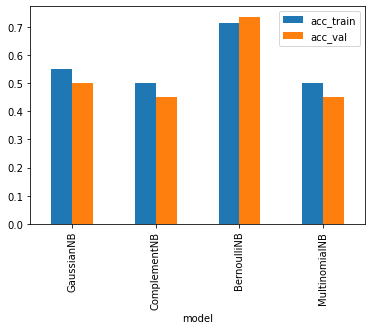

In [129]:
results.plot.bar(x='model', y=['acc_train', 'acc_val'])

### Testing best model

In [130]:
model_best = BernoulliNB()
model_best.fit(X_train, y_train)
y_pred_test = model_best.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.7011494252873564


# 3.Third Model Algorthim is Desision Tree

# Decision Tree Classifier

In [131]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
max_depth_values = list(range(1, 21))
acc_train_values = []
acc_val_values = []

for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_train = model.predict(X_train_balanced)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train_balanced, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
results = pd.DataFrame({
    'max_depth': max_depth_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})
results

,max_depth,acc_train,acc_val
0,1,0.688272,0.516393
1,2,0.709877,0.721311
2,3,0.768519,0.663934
3,4,0.802469,0.647541
4,5,0.848765,0.655738
5,6,0.873457,0.598361
6,7,0.891975,0.631148
7,8,0.919753,0.598361
8,9,0.938272,0.573770
9,10,0.966049,0.606557


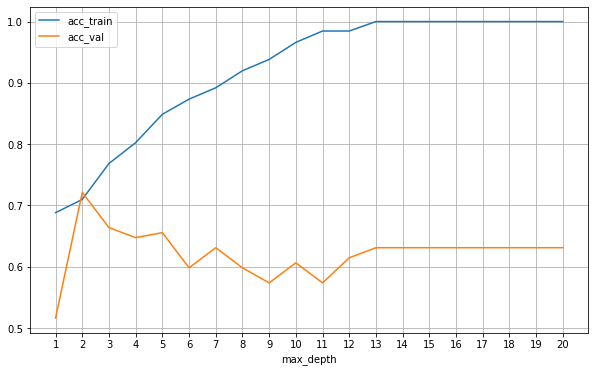

In [133]:
results.plot(x='max_depth', y=['acc_train', 'acc_val'], figsize=(10, 6))
plt.xticks(np.arange(1, 21))
plt.grid(axis='both')
plt.show()

### We select `max_depth = 2`

In [153]:
criterion_values = ['gini', 'entropy']
acc_train_values = []
acc_val_values = []

for criterion in criterion_values:
    model = DecisionTreeClassifier(max_depth=2, criterion=criterion, random_state=0)
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_train = model.predict(X_train_balanced)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train_balanced, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
results = pd.DataFrame({
    'criterion': criterion_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results

,criterion,acc_train,acc_val
0,gini,0.709877,0.721311
1,entropy,0.709877,0.721311


### Gini and entropy the same 

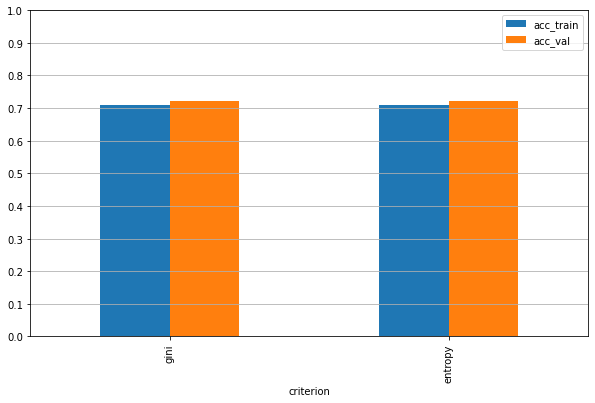

In [154]:
results.plot.bar(x='criterion', y=['acc_train', 'acc_val'], figsize=(10, 6))
plt.grid(axis='y')
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.show()

# best model

In [156]:
model_best = DecisionTreeClassifier(max_depth=2, criterion='gini', random_state=0)
model_best.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [157]:
X_train_balanced.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

### Analysing feature importances

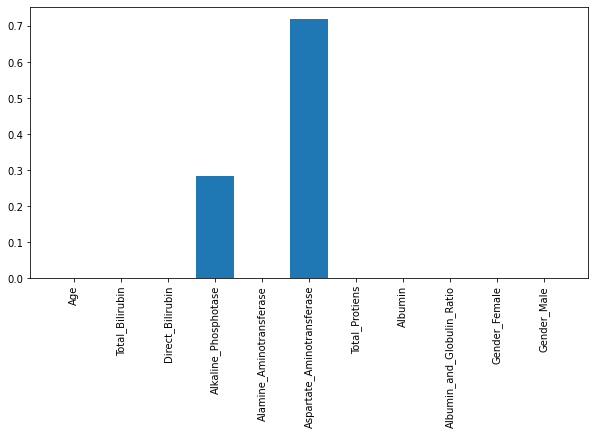

In [158]:
plt.figure(figsize=(10, 5))
plt.bar(X_train_balanced.columns, model_best.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# Visualizing our model

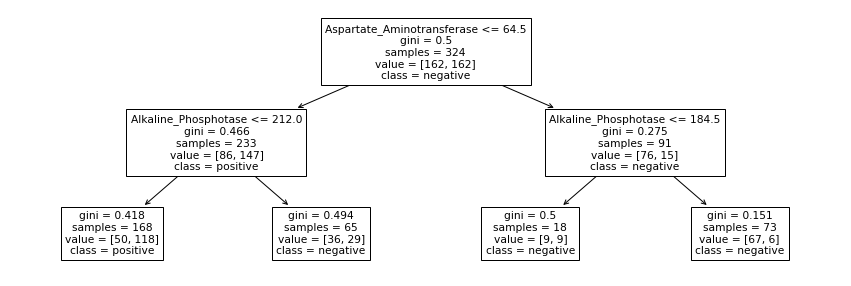

In [159]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 5))
plot_tree(model_best, feature_names=X_train.columns, class_names=['negative', 'positive'])
plt.show()

# testing our model

In [160]:
y_pred_test = model_best.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.632183908045977


In [161]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_test))

[[79 43]
 [21 31]]


In [162]:
# to ignore warrings
import warnings
warnings.filterwarnings('ignore')

# Fourth model Algorthim is Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler

model = Pipeline([
  #('feature_scaling', StandardScaler()),
    ('logistic_regression', LogisticRegression(random_state=0))
])
evaluate_model(model, X_train_balanced, y_train_balanced, X_val, y_val)

(0.7098765432098766, 0.639344262295082)

In [144]:
C_values = [0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
acc_train_values = []
acc_val_values = []

for C in C_values:
    model = Pipeline([
        #('feature_scaling', StandardScaler()),
        ('logistic_regression', LogisticRegression(C=C, random_state=0))
    ])
    acc_train, acc_val = evaluate_model(model, X_train_balanced, y_train_balanced, X_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)

results = pd.DataFrame({
    'C': C_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values
})

results

,C,acc_train,acc_val
0,0.00001,0.694444,0.581967
1,0.00100,0.688272,0.647541
2,0.01000,0.712963,0.655738
3,0.10000,0.716049,0.631148
4,1.00000,0.709877,0.639344
5,10.00000,0.703704,0.614754
6,100.00000,0.703704,0.614754
7,1000.00000,0.703704,0.614754
8,10000.00000,0.719136,0.631148


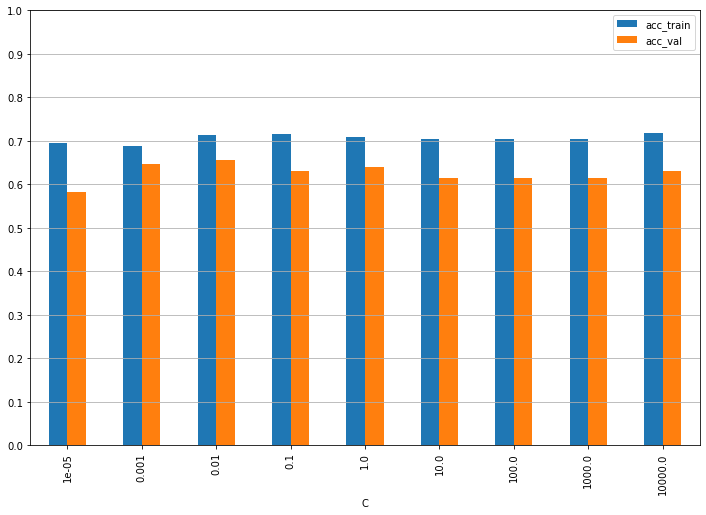

In [145]:
results.plot.bar(x='C', y=['acc_train', 'acc_val'], figsize=(12, 8))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

# Best model

In [146]:
model_best = Pipeline([
   # ('feature_scaling', StandardScaler()),
    ('logistic_regression', LogisticRegression(C=0.001,random_state=0))
])
model_best.fit(X_train, y_train)
y_pred_test = model_best.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.7241379310344828
